# Kalman Filtering / Part 1

This notebook is based on the article

`An Elementary Introduction to Kalman Filtering`  , authors: Yan Pei, Donald S. Fussel, Swarnendu Biswas, Keshav Pingali

I tried to understand most parts of the article.

Other resource on `Kalman Filtering` were either to advanced for a beginner like me or they stated many results without providing a thorough derivation.

Here are some resources I had tried before but found less useful from a beginners perspective:

1) An Introduction to the Kalman Filter; authors: Greg Welch, Gary Bishop

2) Tutorial: The Kalman Filter ; author: Tony Lacey

**Content**

1) scalar estimates, mean values and variances, summation of scalar estimates

2) vector estimates, mean values and covariance matrices, covariance of the sum of vector estimates

3) optimum weigthing factors for the sum of scalar estimates

   a) solution with `Lagrange` multipliers

   b) incremental solution


---



## Scalar Estimates

From a set of random variables $x_1, \ldots, x_N$ with mean values $\mu_1, \ldots, \mu_N$ and variances $\sigma_1^2, \ldots, \sigma_N^2$ a new random variable $y$ is created from a weighted addition:

$$
y = \sum_{n=1}^N w_n \cdot x_n
$$

The mean $\mu_y$ and variance $\sigma_y^2$ of random variable $y$ shall be computed. It shall be assumed that random variables $x_i,\ x_j : i \neq j$ are uncorrelated:

$$
E\left( \left(x_i - \mu_i \right) \cdot \left(x_j - \mu_j \right) \right) = 0
$$


**mean: $\mu_y = E(y)$**

$$
\mu_y = E(y) = \sum_{n=1}^N w_n \cdot E(x_n) = \sum_{n=1}^N w_n \cdot \mu_n
$$

**variance: $\sigma_y^2$**

$$\begin{align*}
\sigma_y^2 &= E\left( (y - \mu_y)^2   \right) \\
\ &= E\left( \left(\sum_{n=1}^N w_n \cdot \left(x_n - \mu_n \right) \right)^2   \right) \\
\ &= E\left(  \sum_{i=1}^N \sum_{j=1}^N w_i \cdot w_j \cdot \left(x_i - \mu_i \right) \cdot \left(x_j - \mu_j \right) \right) \\
\ &=   \sum_{i=1}^N \sum_{j=1}^N w_i \cdot w_j \cdot \underbrace{E\left( \left(x_i - \mu_i \right) \cdot \left(x_j - \mu_j \right) \right)}_{0 : \ i \neq j } \\
\to \\
\sigma_y^2 &= E\left( (y - \mu_y)^2 \right) \\
&= \sum_{n=1}^N w_n^2 \cdot \underbrace{E\left( \left(x_n - \mu_n \right)^2 \right)}_{\sigma_n^2} \\
&= \sum_{n=1}^N w_n^2 \cdot \sigma_n^2
\end{align*}
$$



---


## Vector Estimates


**a single random vector**

A random vector $\mathbf{x}$ has `M` elements / components $x_1, \ldots, x_M$. Each element of the random vector is a random variable with mean $\mu_1, \ldots, \mu_M$ and variances $\sigma_1^2, \ldots, \sigma_M^2$.

$$
\mathbf{x} = \left[\begin{array}{c}
x_1 \\ \vdots \\ x_M
\end{array}\right]
$$

$$
E(\mathbf{x}) = \left[\begin{array}{c}
E(x_1) \\ \vdots \\ E(x_M)
\end{array}\right] = \left[\begin{array}{c}
\mu_1 \\ \vdots \\ \mu_M
\end{array}\right] = \mathbf{\mu}_x
$$

Definition of covariance matrix:

$$
E( \left(\mathbf{x} - \mathbf{\mu}_x\right) \cdot \left(\mathbf{x} - \mathbf{\mu}_x\right)^T ) = \left[\begin{array}{ccc}
E((x_1 - \mu_1) \cdot (x_1 - \mu_1)) & \cdots &  E((x_1 - \mu_1) \cdot (x_M - \mu_M)) \\
\vdots &  \ddots & \vdots \\
E((x_M - \mu_M) \cdot (x_1 - \mu_1)) & \cdots &  E((x_M - \mu_M) \cdot (x_M - \mu_M))
\end{array}\right] 
$$

**several random vectors**

$\mathbf{x}_1, \ldots, \ \mathbf{x}_N$

Random vector $\mathbf{x}_n$ is written like this:

$$
\mathbf{x}_n = \left[\begin{array}{c}
x_{1(n)} \\ \vdots \\ x_{M(n)}
\end{array}\right]
$$

$$
E(\mathbf{x}_n) = \left[\begin{array}{c}
E(x_{1(n)}) \\ \vdots \\ E(x_{M(n)})
\end{array}\right] = \left[\begin{array}{c}
\mu_{1(n)} \\ \vdots \\ \mu_{M(n)}
\end{array}\right] = \mathbf{\mu}_{x(n)}
$$

Defining covariance matrices $\Sigma_i$:

$$
\mathbf{\Sigma_i} = E( \left(\mathbf{x}_i - \mathbf{\mu}_{x(i)}\right) \cdot \left(\mathbf{x}_i - \mathbf{\mu}_{x(i)}\right)^T ) = \left[\begin{array}{ccc}
E((x_{1(i)} - \mu_{1(i)}) \cdot (x_{1(i)} - \mu_{1(i)})) & \cdots &  E((x_{1(i)} - \mu_{1(i)}) \cdot (x_{M(i)} - \mu_{M(i)})) \\
\vdots &  \ddots & \vdots \\
E((x_{M(i)} - \mu_{M(i)}) \cdot (x_{1(i)} - \mu_{1(i)})) & \cdots &  E((x_{M(i)} - \mu_{M(i)}) \cdot (x_{M(i)} - \mu_{M(i)}))
\end{array}\right] 
$$

and requiring that random vectors $\mathbf{x}_i$ and $\mathbf{x}_j$ are uncorrelated $i \neq j$

$$
E\left( \left(\mathbf{x}_i - \mathbf{\mu}_{x(i)}\right) \cdot \left(\mathbf{x}_j - \mathbf{\mu}_{x(j)}\right)^T \right) = \mathbf{0}
$$

With these definitions / notations in place a new random vector $\mathbf{y}$ is defined as the weighted sum of random vectors $\mathbf{x}_1, \ldots, \ \mathbf{x}_N$. This time however the *weighting factors* are no longer scalars but matrices $\mathbf{A}_n$.

$$
\mathbf{y} = \sum_{n=1}^N \mathbf{A}_n \cdot \mathbf{x}_n
$$


**Note**

It is not required that the number of components in vectors $\mathbf{x}_1, \ldots, \ \mathbf{x}_N$ is the same as the number of components in vector $\mathbf{y}$.

**Mean Vector**

$$
\mathbf{\mu_y} = E(\mathbf{y}) = \sum_{n=1}^N \mathbf{A}_n \cdot \mathbf{\mu}_{x(n)}
$$

**Covariance Matrix**

$$
\mathbf{\Sigma_y} = E( \left(\mathbf{y} - \mathbf{\mu_y}\right) \cdot \left(\mathbf{y} - \mathbf{\mu_y}\right)^T ) 
$$

$$\begin{align}
\mathbf{\Sigma_y} &= E\left( \left(\sum_{i=1}^N \mathbf{A}_i \cdot \left(\mathbf{x}_i - \mathbf{\mu}_{x(i)}\right)\right) \cdot \left(\sum_{j=1}^N \mathbf{A}_j \cdot \left(\mathbf{x}_j - \mathbf{\mu}_{x(j)}\right)\right)^T \right) \\
 &= E\left( \left(\sum_{i=1}^N \mathbf{A}_i \cdot \left(\mathbf{x}_i - \mathbf{\mu}_{x(i)}\right)\right) \cdot \left(\sum_{j=1}^N  \left(\mathbf{x}_j - \mathbf{\mu}_{x(j)}\right)^T \cdot \mathbf{A}_j^T \right) \right) \\
 &= \sum_{i=1}^N \sum_{j=1}^N \mathbf{A}_i \cdot E\left(\left(\mathbf{x}_i - \mathbf{\mu}_{x(i)}\right) \cdot \left(\mathbf{x}_j - \mathbf{\mu}_{x(j)}\right)^T \right) \cdot \mathbf{A}_j^T   \\
 &= \sum_{i=1}^N  \mathbf{A}_i \cdot \mathbf{\Sigma_i} \cdot \mathbf{A}_i^T
\end{align}
$$

---


## Combining two scalar random variables (minimising the variance)

Two scalar random variables $x_1$ and $x_2$ with mean $\mu_1$, $\mu_1$ and variances $\sigma_1^2$, $\sigma_2^2$ shall be additively combined into another
scalar random variable $y$.

$$
y = w_1 \cdot x_1 + w_2 \cdot x_2 \ \ with \ w_1 + w_2 = 1
$$

Weights $w_1, \ w_2$ shall be chosen such as to minimise the variance.

**Mean**

$$
\mu_y = E(y) = w_1 \cdot \mu_1 + w_1 \cdot \mu_2
$$

**Variance**

$$
\sigma_y^2 = w_1^2 \cdot \sigma_1^2 + w_2^2 \cdot \sigma_2^2 = w_1^2 \cdot \sigma_1^2 + \left(1-w_1\right)^2 \cdot \sigma_2^2 
$$

Taking the deriviative of $\sigma_y^2$ yields:

$$
\frac{\partial}{dw_1} \sigma_y^2 = 2 \cdot w_1 \cdot \sigma_1^2 - 2 \cdot \left(1-w_1\right) \cdot \sigma_2^2 
$$

Setting the derivative to `0` provides us with the optimum values of weights $w_1,\ w_2$:

$$\begin{align}
w_1 &= \frac{\sigma_2^2}{\sigma_1^2 + \sigma_2^2} =  \frac{1}{\frac{\sigma_1^2}{\sigma_2^2} + \frac{\sigma_1^2}{\sigma_1^2}} = \frac{\frac{1}{\sigma_1^2}}{\frac{1}{\sigma_1^2}+\frac{1}{\sigma_2^2}} \\
w_2 &= \frac{\sigma_1^2}{\sigma_1^2 + \sigma_2^2}\\
 &= \frac{1}{\frac{\sigma_2^2}{\sigma_1^2} + \frac{\sigma_2^2}{\sigma_2^2}} \\
&= \frac{\frac{1}{\sigma_2^2}}{\frac{1}{\sigma_1^2}+\frac{1}{\sigma_2^2}}
\end{align}
$$

The **inverse** of the variance is frequenctly named the **precision**. The smaller the variance the larger the precion.
With $v_1 = \frac{1}{\sigma_1^2}$ and $v_2 = \frac{1}{\sigma_2^2}$ we get a more convenient equation for the weighting factors.

$$\begin{align}
w_1 &= \frac{v_1}{v_1 + v_2} \\
w_2 &= \frac{v_2}{v_1 + v_2}
\end{align}
$$

$$
y = \frac{v_1}{v_1 + v_2} \cdot x_1 + \frac{v_2}{v_1 + v_2} \cdot x_2 
$$

$$\begin{align}
\sigma_y^2 &= \left(\frac{v_1}{v_1 + v_2}\right)^2 \cdot \sigma_1^2 + \left(\frac{v_2}{v_1 + v_2}\right)^2 \cdot \sigma_2^2 \\
 &= \left(\frac{v_1}{v_1 + v_2}\right)^2 \cdot \frac{1}{v_1} + \left(\frac{v_2}{v_1 + v_2}\right)^2 \cdot \frac{1}{v_2} \\
 &= \frac{v_1}{\left(v_1 + v_2\right)^2} + \frac{v_2}{\left(v_1 + v_2\right)^2} = \frac{v_1 + v_2}{\left(v_1 + v_2\right)^2} \\
 &= \frac{1}{v_1 + v_2}
\end{align}
$$

And finally:

$$
v_y = \frac{1}{\sigma_y^2} = v_1 + v_2
$$

An important takeaway from this relationship is that the resulting precision $v_y$ always exceeds $max(v_1, v_2)$. Hence the variance $\sigma_y^2 \lt min(\sigma_1, \sigma_2)$.

---

## Combining many scalar random variables ( `> 2`)

Article `An Elementary Introduction to Kalman Filtering`  discusses two approaches:

1) Solving the problem directly using the method of `Lagrange` multipliers to obtain the optimum weighting factors

2) Obtain optimum weight incrementally


---

### `Lagrange` multipliers

The estimate $y$ is obtained from a weighted sum of `N` random variables $x_1, \ldots,\ x_N$.

$$
y = \sum_{n=1}^N w_n \cdot x_n
$$

Assuming variables $x_1, \ldots,\ x_N$ are mutually uncorrelated the mean and the variance of $y$ had been computed before:

$$
\mu_y = E(y) = \sum_{n=1}^N w_n \cdot E(x_n) = \sum_{n=1}^N w_n \cdot \mu_n
$$

$$
\sigma_y^2 = E\left( (y - \mu_y)^2 \right) = \sum_{n=1}^N w_n^2 \cdot \underbrace{E\left( \left(x_n - \mu_n \right)^2 \right)}_{\sigma_n^2} = \sum_{n=1}^N w_n^2 \cdot \sigma_n^2
$$

Variance $\sigma_y^2$ shall be minimised choosing appropriate weigthing factors. Weighting factors shall be constrained to:

$$
\sum_{n=1}^N w_n = 1
$$


Using `Lagrange` multipliers for the contraint a new function $G(w_1, \ldots, w_N,\ \lambda)$ is defined:

$$
G(w_1, \ldots, w_N,\ \lambda) = \sum_{n=1}^N w_n^2 \cdot \sigma_n^2 - \lambda \left( \sum_{n=1}^N w_n - 1 \right)
$$

Differentiating with respect to $w_1, \dots, \ w_N$ and $\lambda$ yields:

$$\begin{gather}
\frac{\partial G}{\partial w_n} = 2 w_n \cdot \sigma_n^2 - \lambda\\
\frac{\partial G}{\partial \lambda} = \sum_{n=1}^N w_n - 1
\end{gather}
$$

and setting derivatives to `0` :

$$\begin{gather}
w_n = \frac{\lambda / 2}{\sigma_n^2}\\
\sum_{n=1}^N w_n = 1
\end{gather}
$$

$$
\frac{\lambda}{2} = \frac{1}{\sum_{n=1}^N \frac{1}{\sigma_n^2}}
$$

The optimum weights are obtained:

$$
w_n = \frac{\frac{1}{\sigma_n^2}}{\sum_{n=1}^N \frac{1}{\sigma_n^2}}
$$

The weighting factors are proportional to the inverse of the variance of the random variables $x_1, \ldots,\ x_N$. -> **`inverse variance` weighting**.

For the simple case $N=2$ we get:

$$\begin{gather}
w_1 = \frac{\frac{1}{\sigma_1^2}}{\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}} = \frac{\sigma_2^2}{\sigma_1^2 + \sigma_2^2} \\
w_2 = \frac{\frac{1}{\sigma_2^2}}{\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}} = \frac{\sigma_1^2}{\sigma_1^2 + \sigma_2^2} 
\end{gather}
$$

The same result had been obtained for `N=2` without using `Lagrange` multipliers.

---


## Incremental approach

From the `N` random variables $x_1, \ldots,\ x_N$ estimates $y_1, \ldots,\ y_N$ are computed:

$$\begin{align}
y_1 &= g_1 \cdot x_1  \ : \ g_1 = 1 \\
y_2 &= (1-g_2) \cdot y_1 + g_2 \cdot x_2  \\
y_3 &= (1-g_3) \cdot y_2 + g_3 \cdot x_3  \\
\cdots \\
y_n &= (1-g_n) \cdot y_{(n-1)} + g_n \cdot x_n  \\
\cdots \\
y_N &= (1-g_N) \cdot y_{N-1} + g_N \cdot x_N 
\end{align}
$$

The precision (inverse of variance) of random variables $x_1, \ldots,\ x_N$ shall be denoted $v_{x_1}, \ldots,\ v_{x_N}$. 

Similarly the precisions of random variables $y_1, \ldots,\ y_N$ shall be denoted $v_{y_1}, \ldots,\ v_{y_N}$.

**Step#1**

$v_{y_1} = v_{x_1}$ ; $g_1 = 1$ ; $y_1 = g_1 \cdot x_1$

**Step#2**

$v_{y_2} = v_{y_1} + v_{x_2} = v_{x_1} + v_{x_2}$

$$
g_2 = \frac{v_{x_2}}{v_{x_1} + v_{x_2}}
$$

**Step#3**

$v_{y_3} = v_{y_2} + v_{x_3} = v_{x_1} + v_{x_2} + v_{x_3}$

$$
g_3 = \frac{v_{x_3}}{v_{x_1} + v_{x_2} + v_{x_3}}
$$

**Step#n**

$v_{y_n} = v_{y_{n-1}} + v_{x_n} = v_{x_1} + v_{x_2} + \cdots +  v_{x_n} = \sum_{i=1}^n  v_{x_i}$

$$
g_n = \frac{v_{x_n}}{v_{x_1} + v_{x_2} + \cdots +  v_{x_n}} = \frac{v_{x_n}}{\sum_{i=1}^n v_{x_i}}
$$

and for the last step

**Step#N**

$v_{y_N} = \sum_{i=1}^N  v_{x_i}$

$$
g_N = \frac{v_{x_N}}{\sum_{i=1}^N v_{x_i}}
$$

It can be show that $y_N$ computed incrementally gives identical results as the direct computation from

$$
y_N = \sum_{n=1}^N w_n \cdot x_n
$$

From weighting factors $g_1, \ldots,\ g_N$ the optimum weights $w_1, \ldots,\ w_N$ can be deduced. (no formal proof provided in this notebook ...). Thus the incremental computation is equivalent to the direct computation. However with the incremental approach it is not necessary to store the sequence $x_1, \ldots,\ x_N$. This is important if data $x_n$ arrive sequentially. Then if a new data item $x_n$ becomes available the resulting data $y_n$ can be updated using only information about $y_{n-1},\ Var(y_{n-1}),\ x_n,\ Var(x_n) $.

---


## Summary / Addition of 2 scalar estimates

Instead of weighting factors $w_1,\ w_2$ factors $1-K$ and $K$ are introduced. $K$ is also known as the `Kalman Gain`.


$$
y = \left(1 - K \right) \cdot x_1 + K \cdot x_2 = x_1 + K \cdot \left(x_2 - x_1 \right)
$$

$$
\mu_y = \left(1 - K \right) \cdot \mu_{x_1} + K \cdot \mu_{x_2} = \mu_{x_1} + K \left(\mu_{x_2} - \mu_{x_1} \right)
$$

$$
K = \frac{\sigma_1^2}{\sigma_1^2 + \sigma_2^2} = \frac{\frac{1}{\sigma_2^2}}{\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}} = \frac{v_2}{v_1 + v_2}
$$

$$
\sigma_y^2 = \left(1 - K \right)^2 \cdot \sigma_{x_1}^2 + K^2 \cdot \sigma_{x_2}^2 = \sigma_{x_1}^2 - K \cdot \sigma_{x_1}^2
$$

---

## Numerical examples

A series (`N` samples) of gaussian distributed random variables (mean = 1, variance = 1) is created.

The mean value of this distribution shall be estimated sequentially / incrementally. For each data sample the `Kalman` gain is updated.

The result is shown in 3 subplots:

**1'st subplot**

the data series and its mean value

**2'nd subplot**

the estimated mean value

**3'rd subplot**

the logarithm (base 10) of the absolute value of the relative error

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [16]:
N = 10000
mean_val  = 1.0
var_inp = 1.0
rv_gauss = mean_val + var_inp * np.random.randn(N)

yvec = np.zeros(N)

for k in range(N):
    if k == 0:
        y = rv_gauss[0]
        yvec[k] = y
        var_y = var_inp
        continue

    # all other updates
    gain = var_y/(var_y + var_inp)
    y = (1 - gain) * y + gain * rv_gauss[k]
    var_y = var_y * (1 - gain)**2 + var_inp * gain**2
    yvec[k] = y

rel_error = np.log10(np.abs(mean_val - yvec) / mean_val + 1e-6)

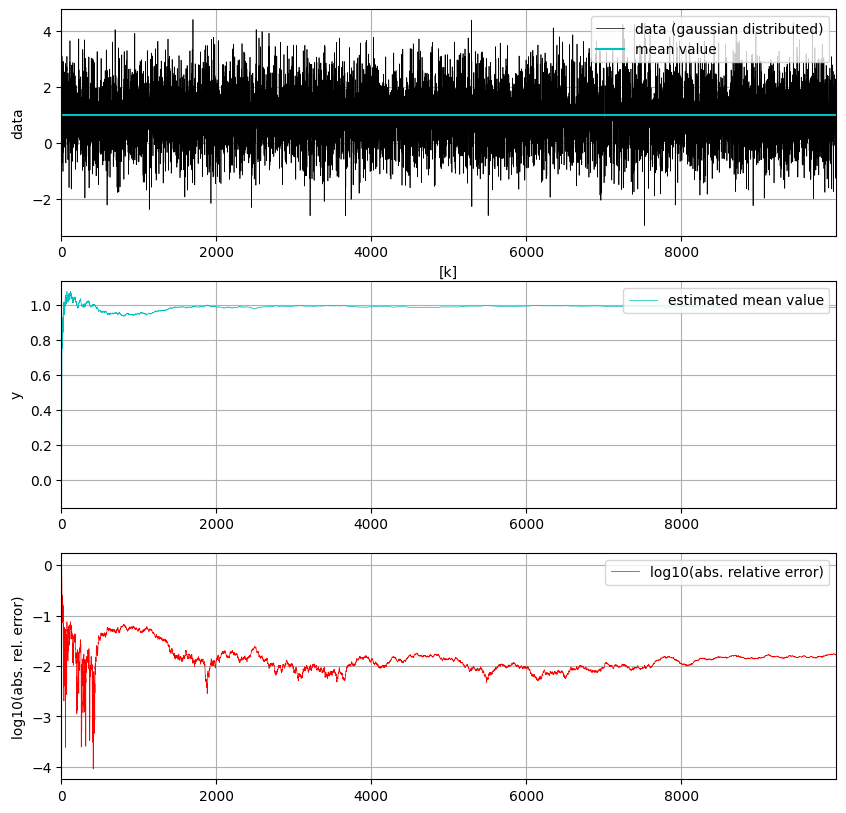

In [21]:
fig1 = plt.figure(1, figsize=[10, 10])
ax_f11 = fig1.add_subplot(3, 1, 1)
ax_f11.plot(rv_gauss, linewidth=0.5, color='k', label='data (gaussian distributed)')
ax_f11.axhline(mean_val, xmin=0, xmax=N-1, color='c', label='mean value')
ax_f11.grid(True)
ax_f11.set_ylabel('data')
ax_f11.set_xlabel('[k]')
ax_f11.legend(loc='upper right')
ax_f11.set_xlim(0, N-1)

ax_f12 = fig1.add_subplot(3, 1, 2)
ax_f12.sharex(ax_f11)
ax_f12.plot(yvec, linewidth=0.5, color='c', label='estimated mean value')

ax_f12.grid(True)
ax_f12.set_ylabel('y')
ax_f12.legend(loc='upper right')

ax_f13 = fig1.add_subplot(3, 1, 3)
ax_f13.sharex(ax_f11)
ax_f13.plot(rel_error, linewidth=0.5, color='r', label='log10(abs. relative error)')

ax_f13.grid(True)
ax_f13.set_ylabel('log10(abs. rel. error)')
ax_f13.legend(loc='upper right');